**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   Estudiante X: ZZZZZZ
*   MATRÍCULA del estudiante X: ZZZZZ
*   Estudiante 2: Alejandra Berenice Vega López
*   MATRÍCULA de la estudiante 2: A01795415
*   Estudiante 3: Israel Luján González
*   MATRÍCULA del estudiante 3: A01794693
*   Estudiante 4: Eduardo Selim Martínez Mayorga
*   MATRÍCULA del estudiante 4: A01795167

In [1]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [2]:
"""
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
os.chdir(DIR)
"""

'\nimport os\nDIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"\nos.chdir(DIR)\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import math
import datetime
import pylab

In [4]:
# El archivo "responses.csv" se encuentra en la misma
# carpeta que este Jupyter Notebook

cars_df = pd.read_csv('vehicles.csv')

# Se verifica la lectura y definición del dataframe
cars_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Se obtiene un breve resumen de las características de `cars_df`:

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.

In [6]:
# Observamos el número de renglones y columnas del dataframe
cars_df.shape

(426880, 26)

In [7]:
# Variables a eliminar
vars_eliminar = ['id', 'VIN', 'url', 'image_url', 'description', 
                 'posting_date']

# Eliminamos las columnas solicitadas
cars_df = cars_df.drop(vars_eliminar, axis=1)

In [8]:
# Reobtenemos el número de renglones y columnas del dataframe
cars_df.shape

(426880, 20)

Se observa que efectivamente se redujo en 6 columnas al número original de columnas

In [9]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
 18  lat 

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores. 

In [10]:
# Número de renglones
num_renglones = len(cars_df)

# Número de columnas
num_columnas = len(cars_df.columns)

In [11]:
num_renglones

426880

In [12]:
num_columnas

20

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [13]:
# Se obtiene el porcentaje de valores faltantes en cada columna
porcentaje_na = (cars_df.isna().sum())/len(cars_df)
porcentaje_na

region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
dtype: float64

In [14]:
# Se enlista aquellas columnas con más del 30% de valores faltantes
porcentaje_na[porcentaje_na >= 0.30]

condition      0.407852
cylinders      0.416225
drive          0.305863
size           0.717675
paint_color    0.305011
county         1.000000
dtype: float64

In [15]:
# Se requiere que al menos el 70% de las observaciones no sean NaN 
obs_requeridas = math.ceil(num_renglones*(1-0.3))
obs_requeridas

298816

In [16]:
# Se eliminan las columnas que no cumplan con el requerimiento
# usando thresh para el número de variables exigidas
cars_df = cars_df.dropna(axis = 1, thresh = obs_requeridas)

Se obtiene de nuevo un resumen del dataframe:

In [17]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
 12  lat           420331 non-null  float64
 13  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 45.6+ MB


Entonces, el número de columnas que conserva el dataframe es de:

In [18]:
len(cars_df.columns)

14

Se puede notar que las **6 columnas que tenían más del 30% de valores faltantes** ya no forman parte del dataframe, i.e. **se eliminaron 6 columnas del dataframe**.

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30% 
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?

De nuevo, obtengamos el número de valores faltantes en cada columna:

In [19]:
# Se obtiene el porcentaje de valores faltantes en cada columna
porcentaje_na = (cars_df.isna().sum())/len(cars_df)
porcentaje_na

region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
type            0.217527
state           0.000000
lat             0.015342
long            0.015342
dtype: float64

Se tiene interés en en las columnas con menos del 5% de valores faltantes. Por tanto se enlistarán dichas variables:

In [20]:
# Se enlista aquellas columnas con menos del 5% de valores faltantes
porcentaje_na[(porcentaje_na > 0) & (porcentaje_na <= 0.05)]

year            0.002823
manufacturer    0.041337
model           0.012362
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
lat             0.015342
long            0.015342
dtype: float64

In [21]:
lista_columnas = porcentaje_na[(porcentaje_na > 0) & (porcentaje_na <= 0.05)].index
lista_columnas = lista_columnas.values.tolist()
lista_columnas

['year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'lat',
 'long']

**IMPORTANTE:** Entonces, se eliminarán los renglones en los que se tenga valor faltante **en todas las columnas** enlistadas

In [22]:
cars_df = cars_df.dropna(subset = lista_columnas, how = 'all')

In [23]:
# El nuevo número de renglones del dataframe
num_renglones_postNA = len(cars_df)
num_renglones_postNA

426812

Entonces, el porcentaje de los registros (renglones) iniciales se eliminaron es

In [24]:
# Recuérdese que en 'num_renglones' está guardado el número original
# de renglones
deleted_rows_percentage = (num_renglones - len(cars_df))/num_renglones
deleted_rows_percentage = deleted_rows_percentage * 100
print(f"Porcentaje de registros borrados: {deleted_rows_percentage}%")

Porcentaje de registros borrados: 0.015929535232383808%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

Como el método de imputación depende del tipo de variable, primero se obtendrá qué tipo de variable es cada una de las columnas, numérica ó categórica:

In [25]:
# Guardamos la serie de los tipos de datos de dataframe en un objeto
x = cars_df.dtypes

# Convertimos la serie guardada en un dataframe
df_columnas = x.apply(pd.Series)

# Se convierte el índice en un columna y se toma a los índices
# como los números naturales
df_columnas.reset_index(inplace=True)

#Cambiamos el nombre de las columnas para mayor entendimiento
df_columnas.columns = ['variable', 'tipo']

# Ahora sí se puede contar cuántas columnas hay de cada tipo
df_columnas['tipo'].value_counts()

object     9
float64    4
int64      1
Name: tipo, dtype: int64

In [26]:
lista_numericas = df_columnas[df_columnas['tipo'] != 'object']['variable']
lista_numericas = lista_numericas.tolist()
lista_numericas

['price', 'year', 'odometer', 'lat', 'long']

In [27]:
lista_categoricas = df_columnas[df_columnas['tipo'] == 'object']['variable']
lista_categoricas = lista_categoricas.tolist()
lista_categoricas

['region',
 'region_url',
 'manufacturer',
 'model',
 'fuel',
 'title_status',
 'transmission',
 'type',
 'state']

Ahora sí se harán las imputaciones correspondientes, para las variables categóricas se usará la moda y para las numéricas la mediana:

In [28]:
# Se sustituyen los faltantes de las variables numéricas
# por la mediana de cada columna
cars_df = cars_df.fillna(cars_df.median()[lista_numericas])

# Se sustituyen los faltantes de las variables categóricas
# por la moda de cada columna
cars_df = cars_df.fillna(cars_df.mode()[lista_categoricas].iloc[0])

In [29]:
# Se le da un vistazo al dataframe
cars_df.head()

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long
27,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590,-85.4800
28,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590,-85.4800
29,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590,-85.4800
30,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590,-85.4800
31,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592,-85.5189


Se calcula de nuevo el número de datos faltantes para verificar la inputación de los valores faltones:

In [30]:
cars_df.isna().sum()

region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
lat             0
long            0
dtype: int64

Se puede notar que efectivamente ya no hay valores faltantes :)

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución. 

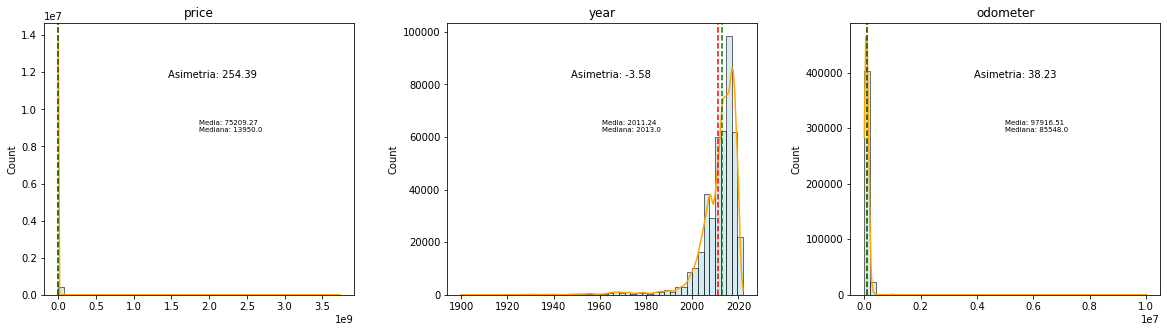

In [31]:
cols_de_interes = ['price', 'year', 'odometer']

fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(cars_df[cols_de_interes], axes):
  sns.histplot(x=cars_df[col], ax=ax, bins=50, kde=True,
               color="lightblue")
  ax.set(title=f'{col}', xlabel=None)
  ax.lines[0].set_color('orange')
  mean = round(cars_df[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  median = round(cars_df[col].median(),2)
  ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
  ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.50, 0.60), xycoords='axes fraction',
              fontsize=7, ha='left')
  asim = round(cars_df[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.40, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left')

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable. 

In [32]:
# Primero se obtiene la fecha actual
fecha_actual = datetime.datetime.now()

# Se extrae el año de dicha fecha actual
anio_actual = fecha_actual.year
anio_actual

2023

In [33]:
# Se crea la variable 'age' como la diferencia entre el año
# actual y el año contenido en el dataframe
cars_df['age'] = anio_actual - cars_df['year']

In [34]:
# Se le da un vistazo al cálculo
cars_df['age'].head()

27     9.0
28    13.0
29     3.0
30     6.0
31    10.0
Name: age, dtype: float64

In [35]:
# Se elimina la columna 'year'
cars_df = cars_df.drop(['year'], axis=1)

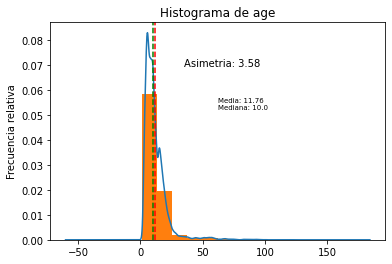

In [36]:
# Hacemos el histograma de 'age'
fig, ax = plt.subplots()
cars_df['age'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de age')
cars_df['age'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa')
mean = round(cars_df['age'].mean(),2)
ax.axvline(mean, color='red', linestyle='dashed', label="Media")
median = round(cars_df['age'].median(),2)
ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.50, 0.60), xycoords='axes fraction',
              fontsize=7, ha='left')
asim = round(cars_df['age'].skew(),2)
ax.annotate('Asimetria: {}'.format(asim), xy=(0.40, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left');

4a) Para visualizar si hay valores atípicos, genera gráficos de boxplot para las tres variables (`price, age, odometer`)

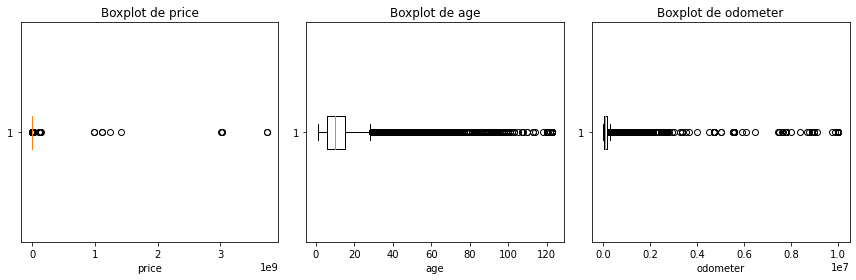

In [37]:
# Realizamos los boxplots
cols_de_interes = ['price', 'age', 'odometer']
plt.figure(figsize=(12, 4))
for i, variable in enumerate(cols_de_interes, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(cars_df[variable], vert=False)
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

Entonces se puede observar la presencia de valores atípicos (outliers) en las tres variables

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

**Importante:** Como en el incision (4a), se considerará sólo a las tres variables (`price, age, odometer`)

In [38]:
# Se calculan los cuartiles 1 y 3 de la variable 'price'
percentile_25 = cars_df['price'].quantile(0.25)
percentile_75 = cars_df['price'].quantile(0.75)

# Se calcula el rango intercuartil
iqr = percentile_75 - percentile_25

# Se define el límite superior como el cuartil 3 más
# 1.5 veces el rango intercuartil
upper_limit = percentile_75 + 1.5 * iqr

# Se define el límite inferior como el cuartil 1 menos
# 1.5 veces el rango intercuartil
lower_limit = percentile_25 - 1.5 * iqr

# Se filtran los valores debajo del límite inferior
# y los de arriba del límite superior
IQR_outliers = cars_df[(cars_df['price'] < lower_limit) | (cars_df['price'] > upper_limit)]

La variable `price` tiene los outliers:

In [39]:
IQR_outliers[['price']]

,price
204,58977
280,987654321
346,98900
365,72900
461,99950
...,...
426694,59900
426716,65950
426778,65995
426810,58995


Esta cantidad de outliers en 'price' representa, con respecto al dataframe post eliminación de valores faltantes:

In [40]:
num_outliers_price = (len(IQR_outliers[['price']])/len(cars_df)) * 100
print(f"Porcentaje de outliers en 'price': {num_outliers_price}%")

Porcentaje de outliers en 'price': 1.9158317947948982%


In [41]:
# Se calculan los cuartiles 1 y 3 de la variable 'age'
percentile_25 = cars_df['age'].quantile(0.25)
percentile_75 = cars_df['age'].quantile(0.75)

# Se calcula el rango intercuartil
iqr = percentile_75 - percentile_25

# Se define el límite superior como el cuartil 3 más
# 1.5 veces el rango intercuartil
upper_limit = percentile_75 + 1.5 * iqr

# Se define el límite inferior como el cuartil 1 menos
# 1.5 veces el rango intercuartil
lower_limit = percentile_25 - 1.5 * iqr

# Se filtran los valores debajo del límite inferior
# y los de arriba del límite superior
IQR_outliers = cars_df[(cars_df['age'] < lower_limit) | (cars_df['age'] > upper_limit)]

La variable `age` tiene los outliers:

In [42]:
IQR_outliers[['age']]

,age
37,31.0
101,55.0
137,57.0
208,47.0
210,54.0
...,...
426729,72.0
426762,41.0
426809,33.0
426831,38.0


Esta cantidad de outliers en 'age' representa, con respecto al dataframe post eliminación de valores faltantes:

In [43]:
num_outliers_age = (len(IQR_outliers[['age']])/len(cars_df)) * 100
print(f"Porcentaje de outliers en 'age': {num_outliers_age}%")

Porcentaje de outliers en 'age': 3.7243563911042803%


In [44]:
# Se calculan los cuartiles 1 y 3 de la variable 'odometer'
percentile_25 = cars_df['odometer'].quantile(0.25)
percentile_75 = cars_df['odometer'].quantile(0.75)

# Se calcula el rango intercuartil
iqr = percentile_75 - percentile_25

# Se define el límite superior como el cuartil 3 más
# 1.5 veces el rango intercuartil
upper_limit = percentile_75 + 1.5 * iqr

# Se define el límite inferior como el cuartil 1 menos
# 1.5 veces el rango intercuartil
lower_limit = percentile_25 - 1.5 * iqr

# Se filtran los valores debajo del límite inferior
# y los de arriba del límite superior
IQR_outliers = cars_df[(cars_df['odometer'] < lower_limit) | (cars_df['odometer'] > upper_limit)]

La variable `odometer` tiene los outliers:

In [45]:
IQR_outliers[['odometer']]

,odometer
138,281000.0
280,999999.0
411,279000.0
455,9999999.0
484,283356.0
...,...
426508,284000.0
426590,291988.0
426643,287000.0
426671,291137.0


Esta cantidad de outliers en 'odometer' representa, con respecto al dataframe post eliminación de valores faltantes:

In [46]:
num_outliers_odometer = (len(IQR_outliers[['odometer']])/len(cars_df)) * 100
print(f"Porcentaje de outliers en 'odometer': {num_outliers_odometer}%")

Porcentaje de outliers en 'odometer': 1.049876760728377%


Se procederá a quitar los valores atípicos.

**Importante:** Se considerá un registro (renglón) como valor no-atípico si es valor no-atípico en las 3 variables: `price`, `age` y `odometer`

In [47]:
# Para la variable 'price'
percentile_25 = cars_df['price'].quantile(0.25)
percentile_75 = cars_df['price'].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
condicion_price = (cars_df['price'] >= lower_limit) & (cars_df['price'] <= upper_limit)

# Para la variable 'age'
percentile_25 = cars_df['age'].quantile(0.25)
percentile_75 = cars_df['age'].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
condicion_age = (cars_df['age'] >= lower_limit) & (cars_df['age'] <= upper_limit)

# Para la variable 'odometer'
percentile_25 = cars_df['odometer'].quantile(0.25)
percentile_75 = cars_df['odometer'].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
condicion_odometer = (cars_df['odometer'] >= lower_limit) & (cars_df['odometer'] <= upper_limit)

In [48]:
cars_df = cars_df[condicion_price & condicion_age & condicion_odometer]

El dataframe sin los valores atípicos tiene el siguiente número de observaciones:

In [49]:
len(cars_df)

399373

Recuérdese que el número de renglones del dataframe original es:

In [50]:
num_renglones

426880

Además, el númiero de renglones una vez que se quitaron los NaNs es:

In [51]:
num_renglones_postNA

426812

Ahora, el número de renglones una vez que también se quitaron los valores atípicos es:

In [52]:
num_renglones_postOutliers = len(cars_df)
num_renglones_postOutliers

399373

Entonces el porcentaje de los registros iniciales (i.e. del archivo .csv original) que  se eliminaron es

In [53]:
# Recuérdese que en 'num_renglones' está guardado el número original
# de renglones
deleted_rows_percentage = (num_renglones - len(cars_df))/num_renglones
deleted_rows_percentage = deleted_rows_percentage * 100
print(f"Porcentaje de registros borrados: {deleted_rows_percentage}%")

Porcentaje de registros borrados: 6.443731259370315%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers. 

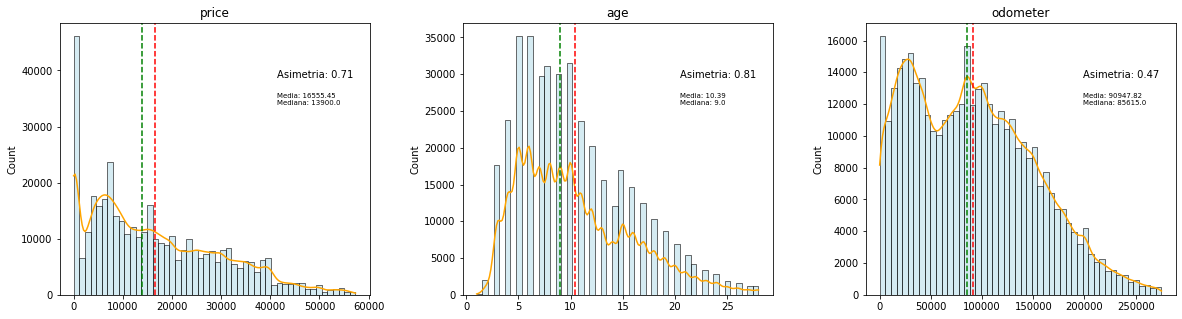

In [54]:
cols_de_interes = ['price', 'age', 'odometer']

fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(cars_df[cols_de_interes], axes):
  sns.histplot(x=cars_df[col], ax=ax, bins=50, kde=True,
               color="lightblue")
  ax.set(title=f'{col}', xlabel=None)
  ax.lines[0].set_color('orange')
  mean = round(cars_df[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  median = round(cars_df[col].median(),2)
  ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
  ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.70, 0.70), xycoords='axes fraction',
              fontsize=7, ha='left')
  asim = round(cars_df[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.70, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left')

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas 

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.

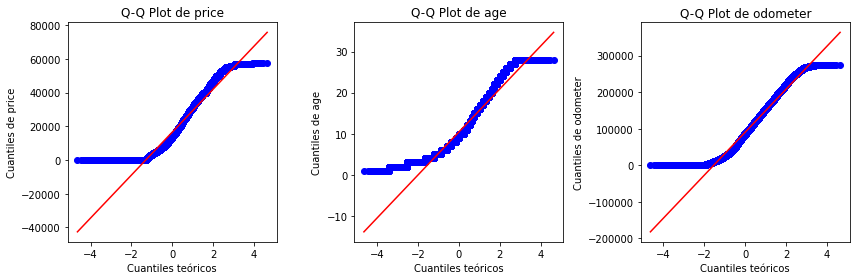

In [55]:
# Realizamos los (normal) QQ-plots de las variables
# 'price', 'age', 'odometer'

variables = ['price', 'age', 'odometer']
plt.figure(figsize=(12, 4))
for i, variable in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    stats.probplot(cars_df[variable], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {variable}')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel(f'Cuantiles de {variable}')

plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [56]:
transf_df = cars_df.copy()

In [57]:
# Se aplica la transformación Yeo-Johnson a las variables
# 'price', 'age', 'odometer'

transf_df['price'] = stats.yeojohnson(transf_df['price'])[0]

transf_df['age'] = stats.yeojohnson(transf_df['age'])[0]

transf_df['odometer'] = stats.yeojohnson(transf_df['odometer'])[0]

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

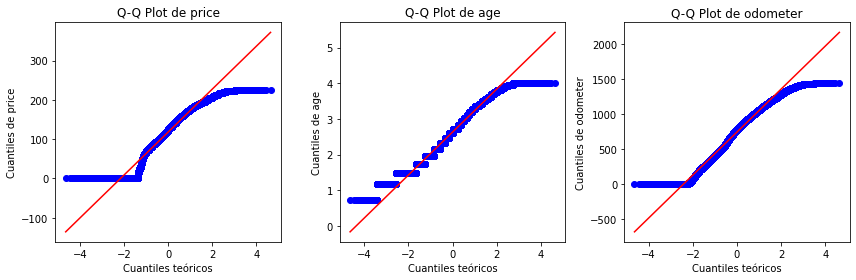

In [58]:
# Realizamos los (normal) QQ-plots de las variables
# 'price', 'age', 'odometer' ya transformadas por Yeo-Johnson

variables = ['price', 'age', 'odometer']
plt.figure(figsize=(12, 4))
for i, variable in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    stats.probplot(transf_df[variable], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {variable}')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel(f'Cuantiles de {variable}')

plt.tight_layout()
plt.show()

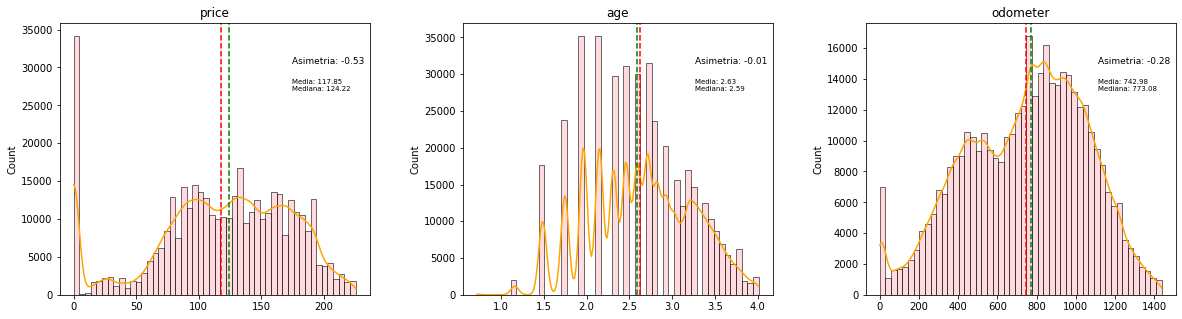

In [59]:
# Realizamos los histogramas de las variables
# 'price', 'age', 'odometer' ya transformadas por Yeo-Johnson

cols_de_interes = ['price', 'age', 'odometer']

fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(transf_df[cols_de_interes], axes):
  sns.histplot(x=transf_df[col], ax=ax, bins=50, kde=True,
               color="lightpink")
  ax.set(title=f'{col}', xlabel=None)
  ax.lines[0].set_color('orange')
  mean = round(transf_df[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  median = round(transf_df[col].median(),2)
  ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
  ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.75, 0.75), xycoords='axes fraction',
              fontsize=7, ha='left')
  asim = round(transf_df[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.75, 0.85), 
              xycoords='axes fraction', fontsize=9, ha='left')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.

**Importante:** Como antes, se considerará sólo a las tres variables (`price, age, odometer`)

In [60]:
# Se define al dataframe sólo con las variables
# 'price', 'age', 'odometer' del dataframe 'transf_df'
minmax_df = transf_df[['price', 'age', 'odometer']].copy()

In [61]:
# Se le da un vistazo al dataframe
minmax_df.head()

,price,age,odometer
27,180.273387,2.592376,628.162162
28,152.519323,3.024250,701.113551
29,193.179943,1.488047,348.720966
30,174.261243,2.150316,523.598278
31,128.288998,2.713224,957.126145


In [62]:
# Se procede al escalamiento Min-Max
minmax_df = (minmax_df-minmax_df.min())/(minmax_df.max()-minmax_df.min())

In [63]:
# Se le da un vistazo al dataframe
minmax_df.head()

,price,age,odometer
27,0.798678,0.569239,0.437181
28,0.675717,0.700396,0.487952
29,0.855859,0.233862,0.242699
30,0.772042,0.434988,0.364407
31,0.568368,0.605939,0.666129


Se puede observar que efectivamente los valores están entre 0 y 1

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

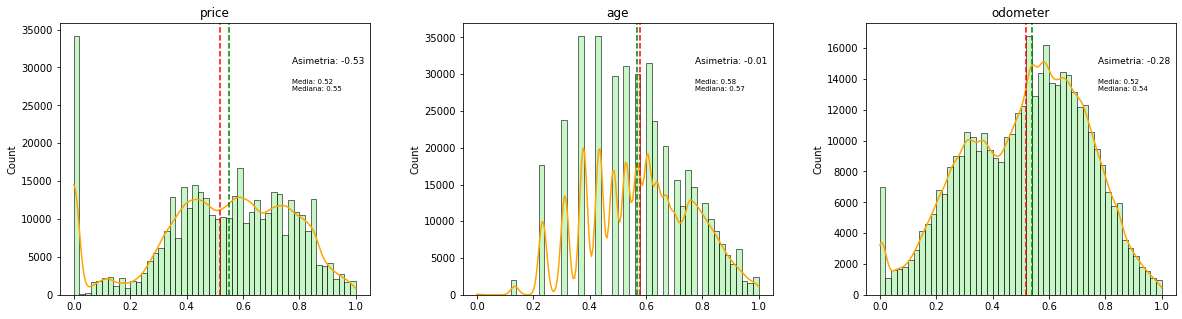

In [64]:
# Realizamos los histogramas de las variables
# 'price', 'age', 'odometer' ya transformadas por Yeo-Johnson
# y además ya escaladas con la transformación Min-Max

cols_de_interes = ['price', 'age', 'odometer']

fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(minmax_df[cols_de_interes], axes):
  sns.histplot(x=minmax_df[col], ax=ax, bins=50, kde=True,
               color="lightgreen")
  ax.set(title=f'{col}', xlabel=None)
  ax.lines[0].set_color('orange')
  mean = round(minmax_df[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  median = round(minmax_df[col].median(),2)
  ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
  ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.75, 0.75), xycoords='axes fraction',
              fontsize=7, ha='left')
  asim = round(minmax_df[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.75, 0.85), 
              xycoords='axes fraction', fontsize=9, ha='left')

Se puede observar que la forma de los histogramas no cambia (histograma rosa v.s. histograma verde)

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas. 

In [65]:
# Se aplica el método 'describe()' para las variables categóricas
cars_df.describe(include = 'object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,399373,399373,399373,399373,399373,399373,399373,399373,399373
unique,404,413,41,25094,5,6,3,13,51
top,columbus,https://washingtondc.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3425,2889,78446,11294,339180,386984,319336,168532,46968


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

**Importante:** El criterio para decir que una variable tiene baja cardinalidad es si el número de categorías que tiene es a lo más 50

In [66]:
descrip_categ = cars_df.describe(include = 'object')
# Se obtiene el número de categorías de cada variable
conteo_categ = descrip_categ.loc[['unique']].iloc[0]

# Se establece el limite de baja/alta cardinalidad
limite = 50

few_cardinal_variables = conteo_categ[conteo_categ <= limite].index.tolist()
highly_cardinal_variables = conteo_categ[~(conteo_categ <= limite)].index.tolist()

Es decir, las variables de baja cardinalidad son:

In [67]:
few_cardinal_variables

['manufacturer', 'fuel', 'title_status', 'transmission', 'type']

Además, las variables de alta cardinalidad son:

In [68]:
highly_cardinal_variables

['region', 'region_url', 'model', 'state']

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

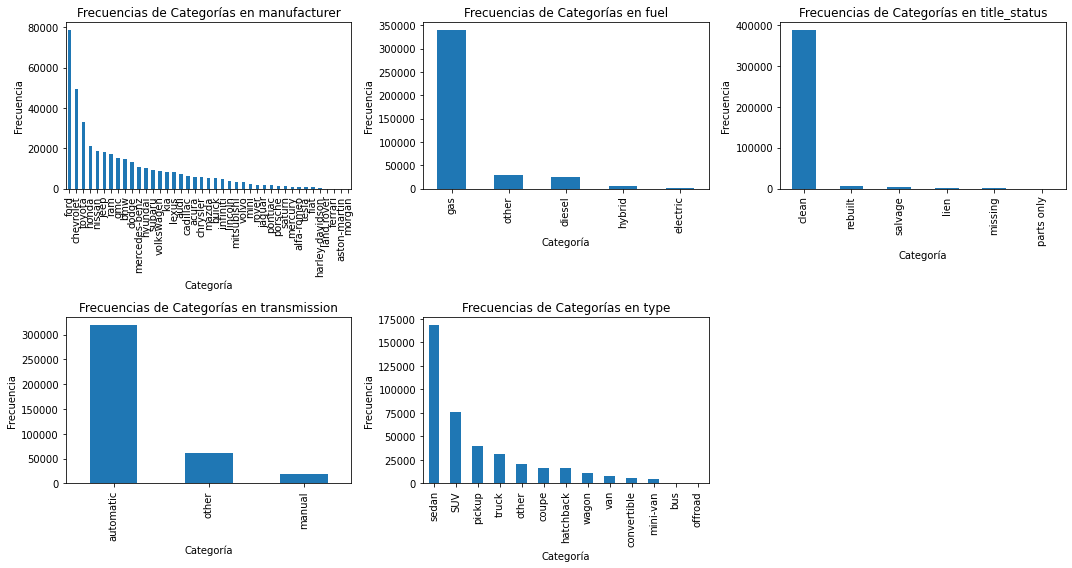

In [69]:
plt.figure(figsize=(15, 8))

for i, variable in enumerate(few_cardinal_variables, 1):
    plt.subplot(2, 3, i)

    # Cuenta las frecuencias de cada categoría y crea un gráfico de barras
    category_counts = cars_df[variable].value_counts()
    category_counts.plot(kind='bar')
    
    plt.title(f'Frecuencias de Categorías en {variable}')
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
cat_cols_encoded = []
for col in few_cardinal_variables:
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(cars_df[col].unique())]

encoder = OneHotEncoder(sparse=False)
cols_onehot = encoder.fit_transform(cars_df[few_cardinal_variables])
df_enc_few = pd.DataFrame(cols_onehot, columns = cat_cols_encoded)

In [72]:
# Se le da un vistazo al dataframe
df_enc_few.head()

,m_gmc,m_chevrolet,m_toyota,m_ford,m_jeep,m_nissan,m_ram,m_mazda,m_cadillac,m_honda,...,t_coupe,t_SUV,t_hatchback,t_mini-van,t_sedan,t_offroad,t_bus,t_van,t_convertible,t_wagon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
# Número de columnas del dataframe 'df_enc_few'
len(df_enc_few.columns)

68

Note que el número de columnas de este dataframe (con one-hot encoding) coincide con el número total de categorías de las variables de baja cardinalidad. A saber,

In [74]:
descrip_categ[few_cardinal_variables].loc['unique'].sum()

68

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [75]:
cat_cols_encoded = []
for col in highly_cardinal_variables:
    categorias = list(cars_df[col].unique())
    cat_cols_encoded += [f"{col[0:2]}_{cat}" for cat in categorias[1:]]

encoder = OneHotEncoder(drop='first', sparse=False)
cols_onehot = encoder.fit_transform(cars_df[highly_cardinal_variables])
df_enc_high = pd.DataFrame(cols_onehot, columns = cat_cols_encoded)

In [76]:
# Se le da un vistazo al dataframe
df_enc_high.head()

,re_birmingham,re_dothan,re_florence / muscle shoals,re_gadsden-anniston,re_huntsville / decatur,re_mobile,re_montgomery,re_tuscaloosa,re_anchorage / mat-su,re_fairbanks,...,st_sd,st_tn,st_tx,st_ut,st_vt,st_va,st_wa,st_wv,st_wi,st_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Número de columnas del dataframe 'df_enc_high'
len(df_enc_high.columns)

25958

Note que el número de columnas de este dataframe (con binary encoding) coincide con el número total de categorías de las variables de alta cardinalidad **menos** el número de variables de alta cardinalidad. A saber,

In [78]:
categ_menos1 = descrip_categ[highly_cardinal_variables].loc['unique'] - 1
categ_menos1.sum()

25958

10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

El dataframe solicitado tendrá las columnas de los dataframes

+ `minmax_df`
+ `df_enc_few`
+ `df_enc_high`

Es decir,

In [79]:
len(minmax_df.columns)+len(df_enc_few.columns)+len(df_enc_high.columns)

26029

**Observación importante:** Tuvimos un problema de recursos dado que el objeto que se intenta crear es muy grande: un dataframe con 26,029 columnas. Ni en Jupyer Notebook en equipos locales ni en Google Colab se tuvo la memoria suficiente para ejecutar. Por tanto no se pudo construir lo solicitado. Sin embargo la sintaxis de los solicitado es muy sencilla:

In [ ]:
# Se concatenan los dataframe
df_final = pd.concat([minmax_df, df_enc_few, df_enc_high],
          axis=1, ignore_index=True)

In [ ]:
df_final.head(2)